<h2>Task - 9<h/2> 
    
<h2> Register Id: SIRSS2292
    
    
Name: Mahesh Deshmukh</h2>

<b>Leaf Classification:</b>


The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.
Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.

More Details & Dataset: https://www.kaggle.com/c/leaf-classification/data

In [1]:
# Load the all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# display the data
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
train_data.shape

(990, 194)

In [5]:
test_data.shape

(594, 193)

In [6]:
test_data.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


here species is target columns. and others are independent variables.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
train_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


### Data Wrangling 

In [9]:
# deal with duplicate value
train_data.duplicated().sum()

0

In [10]:
test_data.duplicated().sum()

0

In [11]:
# deal with null value
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [12]:
null_col = [ncol for ncol in train_data.columns if train_data[ncol].isnull().all() > 0]

In [13]:
null_col

[]

There is no null value in any columns in traing dataset.

In [14]:
null_col = [ncol for ncol in test_data.columns if test_data[ncol].isnull().all() > 0]

In [15]:
null_col

[]

Similarly, there is no null value in any columns in the testing dataset.

### Data Visualization 

C:\Users\91950\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


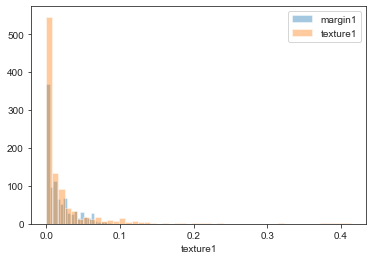

In [16]:
sns.set_style('ticks')
sns.distplot(a=train_data['margin1'],kde=False,label='margin1')
sns.distplot(a=train_data['texture1'],kde=False,label='texture1')
plt.legend()
plt.show()

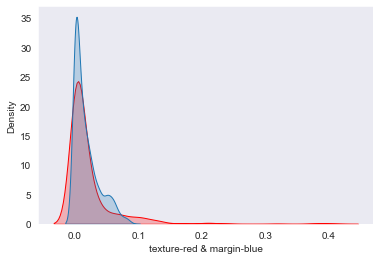

In [17]:
sns.set_style('dark')
sns.kdeplot(data=train_data['texture1'],shade=True,color='r')
sns.kdeplot(data=train_data['margin1'],shade=True)
plt.xlabel('texture-red & margin-blue')
plt.show()

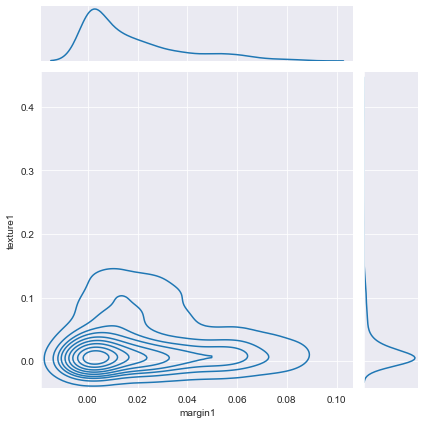

In [18]:
sns.set_style('darkgrid')
sns.jointplot(x=train_data['margin1'],y=train_data['texture1'],data=train_data,kind='kde')
plt.show()

<AxesSubplot:>

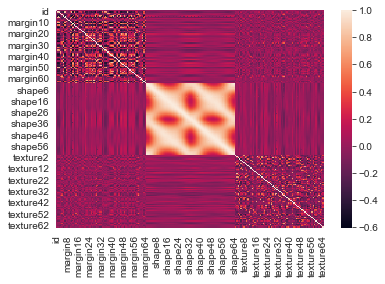

In [19]:
sns.heatmap(train_data.corr())

In [20]:
y = train_data.species

In [21]:
train_copy = train_data.copy()

In [22]:
X = train_data.drop(['species'],axis=1)

In [23]:
y.shape

(990,)

In [24]:
X.shape

(990, 193)

In [25]:
# split the data into train and test data
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=0)

In [27]:
X_train.shape

(792, 193)

In [28]:
X_test.shape

(198, 193)

In [ ]:
# model

In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
bc_model = BaggingClassifier(n_estimators=70,n_jobs=4)

In [31]:
bc_model.fit(X_train,y_train)

BaggingClassifier(n_estimators=70, n_jobs=4)

In [32]:
bc_pred = bc_model.predict(X_test)

In [33]:
# accuracy score
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,bc_pred)

0.9040404040404041

In [35]:
from sklearn.metrics import confusion_matrix   

In [36]:
confusion_matrix(y_test,bc_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,bc_pred,zero_division=1))

                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         3
             Acer_Circinatum       1.00      1.00      1.00         1
                   Acer_Mono       1.00      1.00      1.00         1
                 Acer_Opalus       1.00      1.00      1.00         2
               Acer_Palmatum       1.00      1.00      1.00         3
                 Acer_Pictum       1.00      1.00      1.00         3
             Acer_Platanoids       1.00      1.00      1.00         2
                 Acer_Rubrum       1.00      1.00      1.00         1
              Acer_Rufinerve       1.00      1.00      1.00         3
            Acer_Saccharinum       1.00      1.00      1.00         1
               Alnus_Cordata       1.00      1.00      1.00         4
          Alnus_Maximowiczii       1.00      1.00      1.00         1
                 Alnus_Rubra       1.00      1.00      1.00         2
           Alnus_Si

In [39]:
# final model
bc_model.fit(X,y)

BaggingClassifier(n_estimators=70, n_jobs=4)

In [40]:
final_pred = bc_model.predict(test_data)

In [41]:
probability = bc_model.predict_proba(X_test)

In [42]:
test_data.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [43]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [44]:
test_x = test_data.values

In [45]:
test_ids = test_data.pop('id')

In [46]:
x = train_copy.drop(['species'],axis=1).values

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(train_data['species'])
z = encoder.transform(train_data['species'])

In [48]:
x.shape

(990, 193)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
test_x = sc.transform(test_x)
test_y = bc_model.predict_proba(test_x)

In [50]:
submission = pd.DataFrame(test_y, index=test_ids, columns=encoder.classes_)

In [51]:
submission.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.000000,0.0,0.014286,0.000000,0.000000,0.000000,0.0,0.0,0.014286,...,0.000000,0.014286,0.014286,0.0,0.000000,0.0,0.000000,0.0,0.014286,0.000000
7,0.0,0.000000,0.0,0.000000,0.000000,0.028571,0.100000,0.0,0.0,0.014286,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
9,0.0,0.014286,0.0,0.000000,0.228571,0.000000,0.000000,0.0,0.0,0.042857,...,0.028571,0.000000,0.000000,0.0,0.014286,0.0,0.000000,0.0,0.000000,0.000000
12,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.128571,0.0,0.0,0.000000,...,0.157143,0.000000,0.000000,0.0,0.000000,0.0,0.057143,0.0,0.000000,0.000000
13,0.0,0.000000,0.0,0.000000,0.071429,0.000000,0.128571,0.0,0.0,0.000000,...,0.085714,0.000000,0.142857,0.0,0.014286,0.0,0.014286,0.0,0.000000,0.014286


In [52]:
submission.to_csv('submission_leaf_classification.csv')

In [ ]:
# thank you for your time!